#  Should we buy this stock?

You’re a financial analyst to an important investor who is interested in a particular stock (maybe because he read r/wallstreetbets). He wants to know if the particular stock behaves independently to the overall stock market.

Your goal is not to forecast the stock market prices, but to compare the company's stock prices to the US market. This is a much more actionable analysis since it identifies when a stock deviates from the market and thus may present as an opportunity.

You can perform this analysis on **many companies** falling in the same group (for example FAANG) and compare them against each other.

In [ ]:
# install the yahoo finance API package
!pip install yfinance

In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf

- Describe the companies by utilizing the commands available in the API (https://pypi.org/project/yfinance/)

- Plot their stock prices on the same graph

- Group by date and compare their daily, monthly and annual return

In [ ]:
data = ["AAPL", "AMZN", "META", "GOOG", "NFLX", "^GSPC"]

start_date = "2018-07-15"
end_date = "2023-07-15"

data = yf.download(data, start=start_date, end=end_date)["Adj Close"]


[*********************100%***********************]  6 of 6 completed


In [ ]:

data.isnull().sum()

AAPL     0
AMZN     0
GOOG     0
META     0
NFLX     0
^GSPC    0
dtype: int64

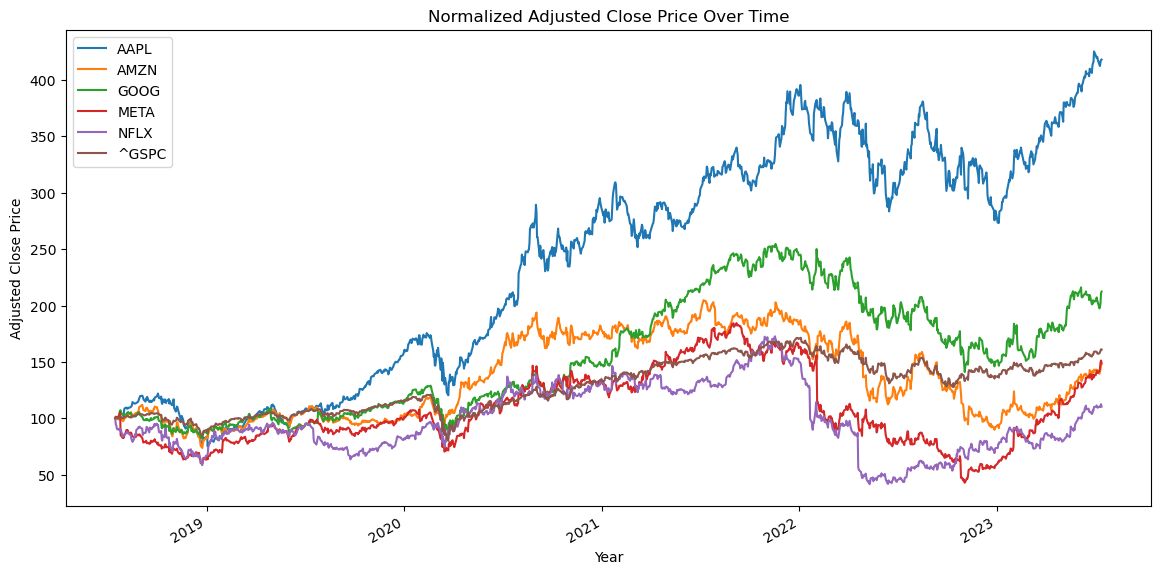

In [ ]:
# Plotting the normalized adjusted close prices
# normalize the dtaa first before plotting - makes for a more meaningful comparison
normalized_data = data / data.iloc[0] * 100
normalized_data.plot(figsize=(14, 7))
plt.title('Normalized Adjusted Close Price Over Time')
plt.ylabel('Adjusted Close Price')
plt.xlabel('Year')
plt.grid(False)
plt.show()


##Trend##

Adjusted Close Price Over Time

In the plot above, we observe the normalised adjusted close of AAPL, AMZN, META, GOOG, NFLX, and the S&P 500 (^GSPC) over the past five years.

Observations:

Apple (AAPL) has demonstrated a robust and consistent growth trajectory over the past five years. Its performance not only exhibits a steady upward trend, but also consistently surpasses the S&P 500.

Google (GOOG) also reveals a consistent pattern of growth, although it is accompanied by higher volatility. This is particularly noticeable during certain periods where the stock's value fluctuates more rapidly. We observe an initial phase of moderate growth, which then accelerates, only to be followed by a slight contraction.

Amazon (AMZN) still shows an overall growth trend across the five years, but its performance in the latter two years, starting from 2022, raises potential concerns. During this period, AMZN's growth has decelerated and the stock has begun to underperform compared to the S&P 500

META and NFLX sBoth stocks have underperformed when benchmarked against the S&P 500 during the observed period. This suggests that these stocks may pose higher investment risks

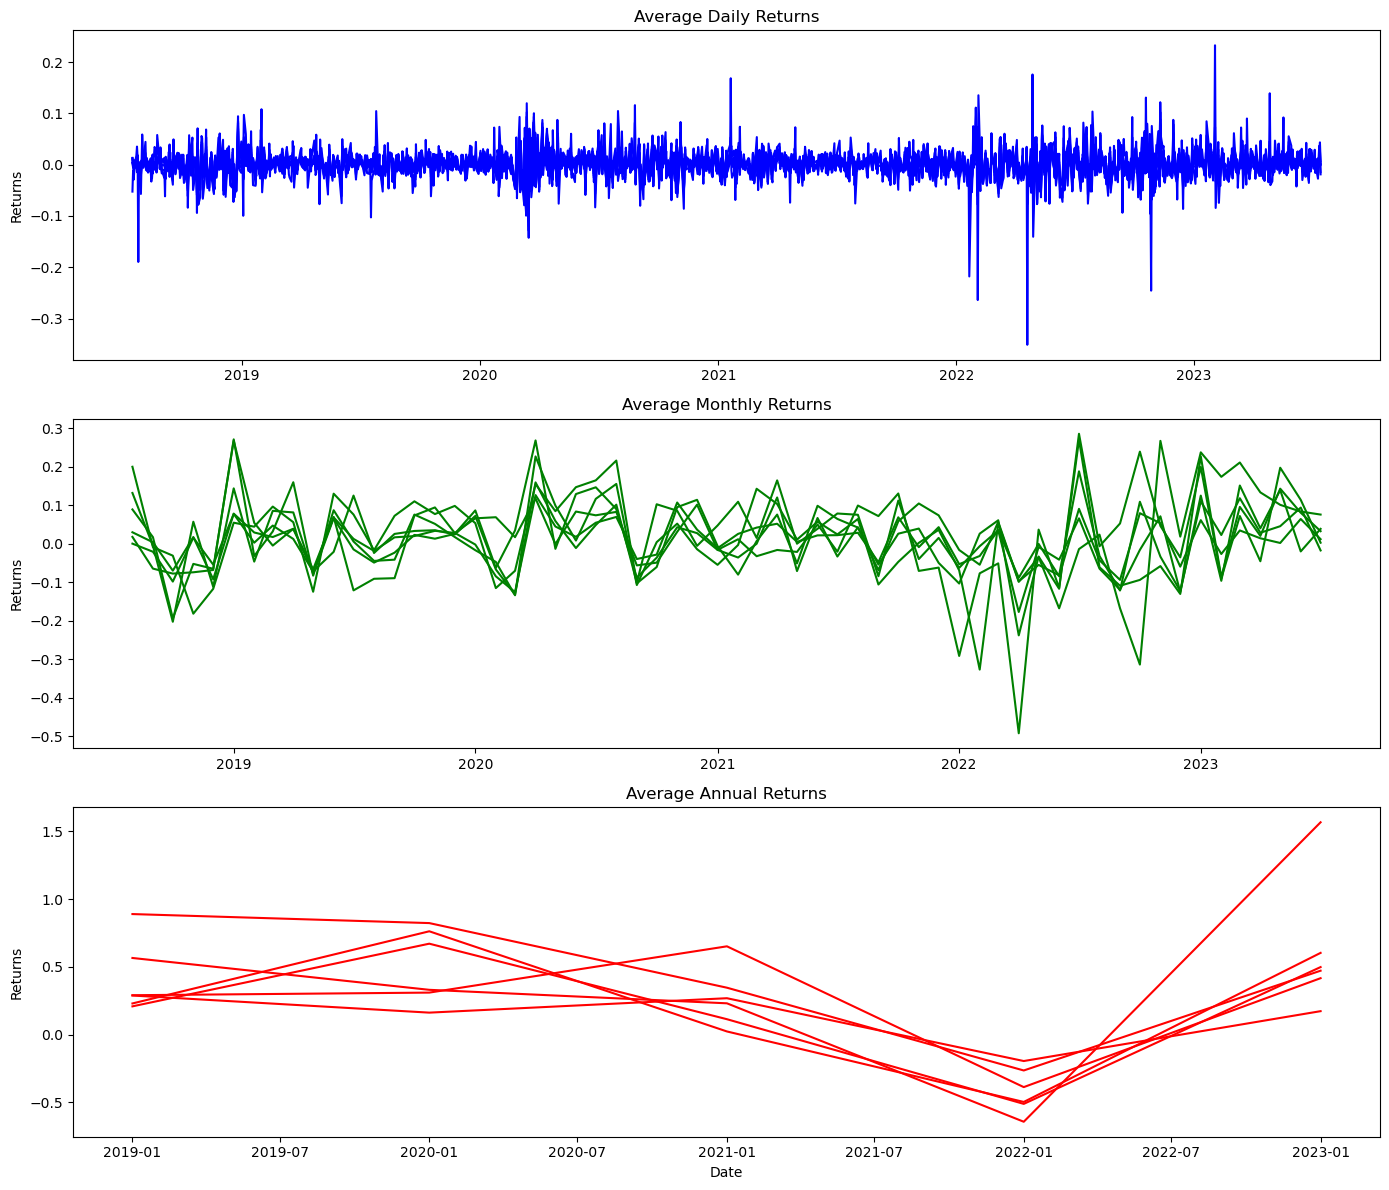

In [ ]:
daily_returns = normalized_data.pct_change()
monthly_returns = normalized_data.resample('M').ffill().pct_change()
annual_returns = normalized_data.resample('Y').ffill().pct_change()

daily_avg_returns = daily_returns.groupby(daily_returns.index.date).mean()
monthly_avg_returns = monthly_returns.groupby(monthly_returns.index.to_period('M')).mean()
annual_avg_returns = annual_returns.groupby(annual_returns.index.to_period('Y')).mean()

fig, axes = plt.subplots(3, 1, figsize=(14, 12))
axes[0].plot(daily_avg_returns, color='b')
axes[0].set_title('Average Daily Returns')
axes[0].set_ylabel('Returns')

# Convert the index of monthly_avg_returns to date format
monthly_avg_returns.index = monthly_avg_returns.index.to_timestamp()

axes[1].plot(monthly_avg_returns, color='g')
axes[1].set_title('Average Monthly Returns')
axes[1].set_ylabel('Returns')

# Convert the index of annual_avg_returns to date format
annual_avg_returns.index = annual_avg_returns.index.to_timestamp()

axes[2].plot(annual_avg_returns, color='r')
axes[2].set_title('Average Annual Returns')
axes[2].set_ylabel('Returns')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate summary statistics of the closing prices
closing_prices_stats = data.describe()
print(closing_prices_stats)


              AAPL         AMZN         GOOG         META         NFLX  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean    109.306936   123.102835    91.528164   221.410620   392.238513   
std      46.752770    32.943420    30.081742    67.650607   116.863447   
min      34.209961    67.197998    48.811001    88.910004   166.369995   
25%      56.352308    93.082626    61.767125   170.925003   310.515007   
50%     122.898407   115.005001    88.748253   202.295006   363.915009   
75%     148.283772   158.093746   116.735249   271.372513   494.557503   
max     193.970001   186.570496   150.709000   382.179993   691.690002   

             ^GSPC  
count  1258.000000  
mean   3598.889419  
std     647.937393  
min    2237.399902  
25%    2942.077515  
50%    3697.140015  
75%    4153.915039  
max    4796.560059  


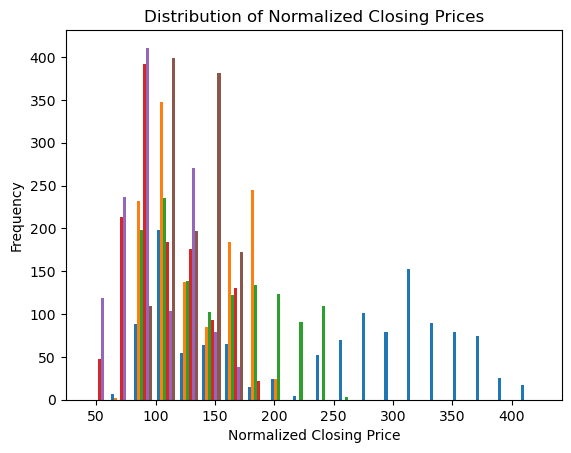

In [ ]:
# Plotting the histogram of the normalized closing prices
plt.hist(normalized_data, bins=20)
plt.title('Distribution of Normalized Closing Prices')
plt.xlabel('Normalized Closing Price')
plt.ylabel('Frequency')
plt.show()

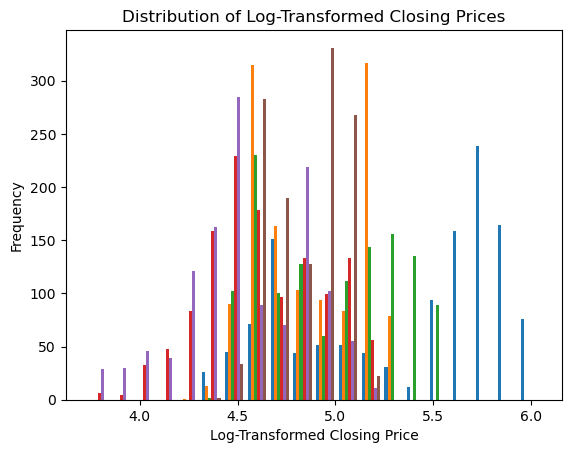

In [ ]:

# Apply log transformation to the normalized closing prices
log_normalized_data = np.log(normalized_data)

# Plot the histogram of the log-transformed data
plt.hist(log_normalized_data, bins=20)
plt.title('Distribution of Log-Transformed Closing Prices')
plt.xlabel('Log-Transformed Closing Price')
plt.ylabel('Frequency')
plt.show()


# Compare the US market return with the Company's return

- Donwload recent data for US returns : https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

- Please refer to [this tutorial](https://youtu.be/ucKK528ApCw) here if you'd like more context

- Match the dates of both dataframes and calculate return **Return = (Today-Yesterday)/Today**
- Plot both returns on one chart to check for similar characteristics

I used the NYSE as a representative of the US market. The NYSE's large market capitalization and extensive list of companies make it a comprehensive reflection of the US economy. With diverse industry representation, the NYSE captures trends and fluctuations across multiple sectors. As a benchmark for various indices and financial instruments, its movements are indicators of market sentiment. The NYSE's broad investor participation and regulatory oversight contribute to its reputation as a reliable representation of the US market

# Linear regression

In [ ]:
import pandas as pd
nyse = pd.read_csv('^NYA.csv', parse_dates=['Date'], index_col='Date')
goog_df = pd.read_csv('GOOG.csv', parse_dates=['Date'], index_col='Date')


goog_df.shape

nyse['Return'] = nyse ['Close'].pct_change()
goog_df['Return'] = goog_df ['Close'].pct_change()

goog_df

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2018-07-19,59.549999,60.000000,59.166000,59.348000,59.348000,25534000,NaN
2018-07-20,59.348000,59.842999,59.210999,59.245499,59.245499,24948000,-0.001727
2018-07-23,59.050499,60.324501,59.049999,60.275002,60.275002,52384000,0.017377
2018-07-24,63.129501,63.299999,61.778000,62.403999,62.403999,66364000,0.035321
2018-07-25,61.956501,63.292999,61.956501,63.185001,63.185001,42556000,0.012515
...,...,...,...,...,...,...,...
2023-07-11,116.760002,118.224998,115.830002,117.709999,117.709999,18286600,0.007187
2023-07-12,119.300003,120.959999,119.000000,119.620003,119.620003,22059600,0.016226
2023-07-13,121.540001,125.334999,121.059998,124.830002,124.830002,31535900,0.043555


In [ ]:
merged_df = pd.merge(nyse[['Return']], goog_df[['Return']], left_index=True, right_index=True, how='inner')
merged_df.columns = ['nyse_return', 'goog_return']

X = merged_df[['nyse_return']]
y = merged_df['goog_return']

import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X, missing='drop')  # drop rows with missing values
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            goog_return   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     929.5
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          3.51e-153
Time:                        00:45:59   Log-Likelihood:                 3466.4
No. Observations:                1255   AIC:                            -6929.
Df Residuals:                    1253   BIC:                            -6919.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0005      0.000      1.222      

- Run linear regression between both returns and check if the slope is statistically significant. If it is close to 1 then the Global US market and the chosen company behave in the same manner.

- Check the accuracy of your model.

- Run a T test to check if the slope in close to 1 or not

- Conclude your analysis. Which companies follow the same market trend that you would recommend to your investor ?

In [ ]:
import matplotlib.pyplot as plt



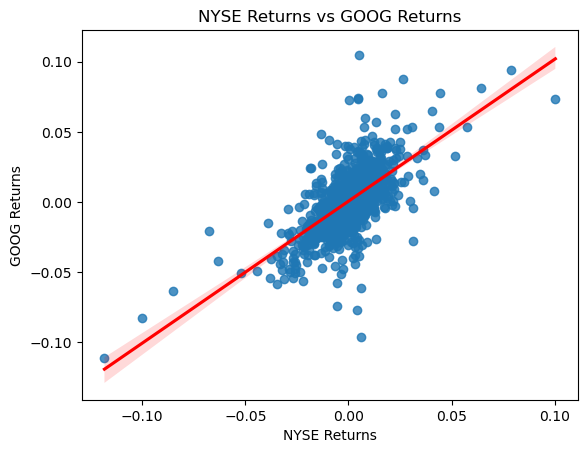

In [ ]:
import seaborn as sns

# Create a DataFrame from X and y for easier plotting
df_plot = pd.DataFrame({
    'NYSE Returns': X['nyse_return'],
    'GOOG Returns': y
})

# Use seaborn to create a scatterplot of the data and fit a regression line
sns.regplot(x='NYSE Returns', y='GOOG Returns', data=df_plot, line_kws={'color': 'red'})

# Set the title
plt.title('NYSE Returns vs GOOG Returns')

# Display the plot
plt.show()


In [ ]:
print("Predicted y-values:", results.fittedvalues)
print("Min and Max of NYSE Returns:", X['nyse_return'].min(), X['nyse_return'].max())


Predicted y-values: Date
2018-07-20    0.000799
2018-07-23    0.000855
2018-07-24    0.004753
2018-07-25    0.007311
2018-07-26    0.002073
                ...   
2023-07-11    0.010063
2023-07-12    0.007780
2023-07-13    0.006566
2023-07-14   -0.003656
2023-07-17    0.001407
Length: 1255, dtype: float64
Min and Max of NYSE Returns: -0.11834138426723428 0.10036485166902742


# Take it further

- Run Linear regression between all FAANG companies and compare your results to the comparision with the US market.

In [ ]:
amzn = pd.read_csv('AMZN.csv', parse_dates=['Date'], index_col='Date')
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
nflx = pd.read_csv('NFLX.csv', parse_dates=['Date'], index_col='Date')
goog = pd.read_csv('GOOG.csv', parse_dates=['Date'], index_col='Date')
meta = pd.read_csv('META.csv', parse_dates=['Date'], index_col='Date')  # replace 'META.csv' with your actual filename


In [ ]:
amzn['Return'] = amzn['Close'].pct_change()
aapl['Return'] = aapl['Close'].pct_change()
nflx['Return'] = nflx['Close'].pct_change()
goog['Return'] = goog['Close'].pct_change()
meta['Return'] = meta['Close'].pct_change()


Regression results for AMZN:
                            OLS Regression Results                            
Dep. Variable:            AMZN_return   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     462.1
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           1.67e-87
Time:                        00:54:25   Log-Likelihood:                 3152.2
No. Observations:                1255   AIC:                            -6300.
Df Residuals:                    1253   BIC:                            -6290.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.000

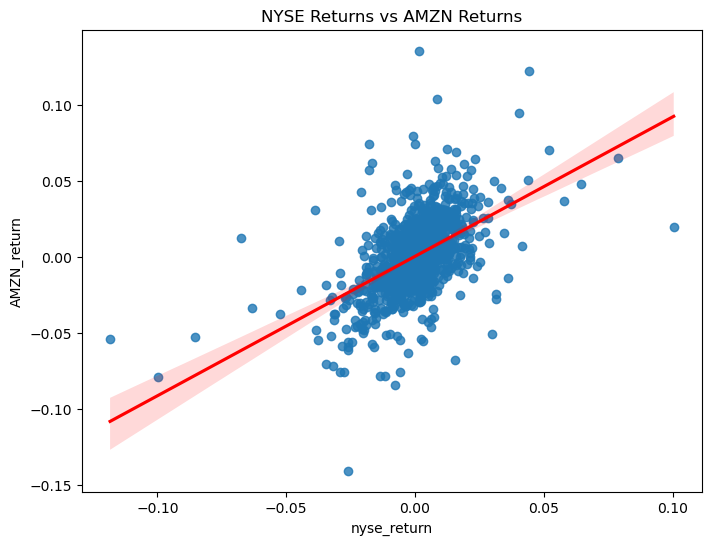

Regression results for AAPL:
                            OLS Regression Results                            
Dep. Variable:            AAPL_return   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     1090.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          1.51e-172
Time:                        00:54:26   Log-Likelihood:                 3460.4
No. Observations:                1255   AIC:                            -6917.
Df Residuals:                    1253   BIC:                            -6906.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.001

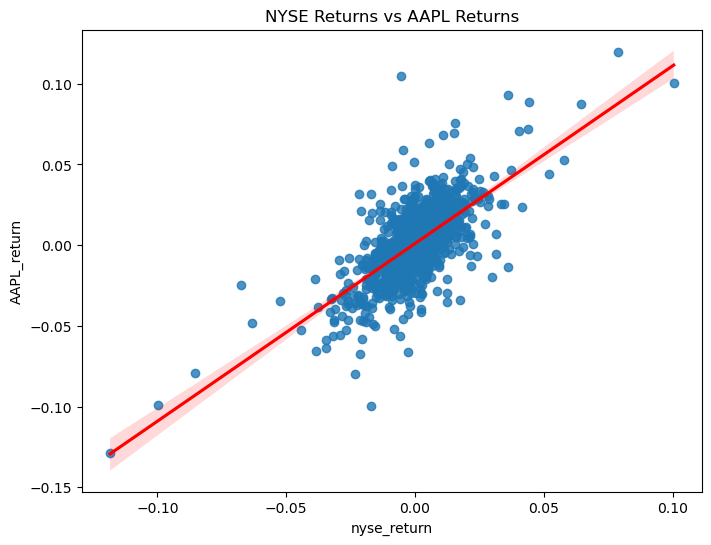

Regression results for NFLX:
                            OLS Regression Results                            
Dep. Variable:            NFLX_return   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     245.0
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           1.41e-50
Time:                        00:54:27   Log-Likelihood:                 2742.9
No. Observations:                1255   AIC:                            -5482.
Df Residuals:                    1253   BIC:                            -5471.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.000

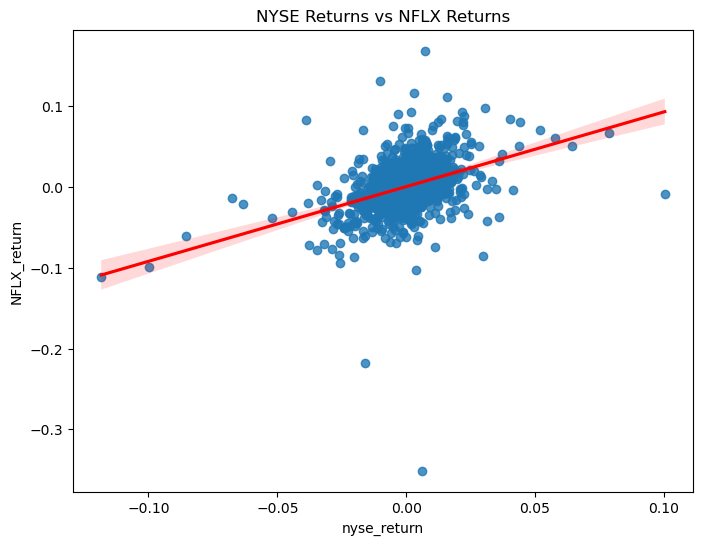

Regression results for GOOG:
                            OLS Regression Results                            
Dep. Variable:            GOOG_return   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     929.5
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          3.51e-153
Time:                        00:54:27   Log-Likelihood:                 3466.4
No. Observations:                1255   AIC:                            -6929.
Df Residuals:                    1253   BIC:                            -6919.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.000

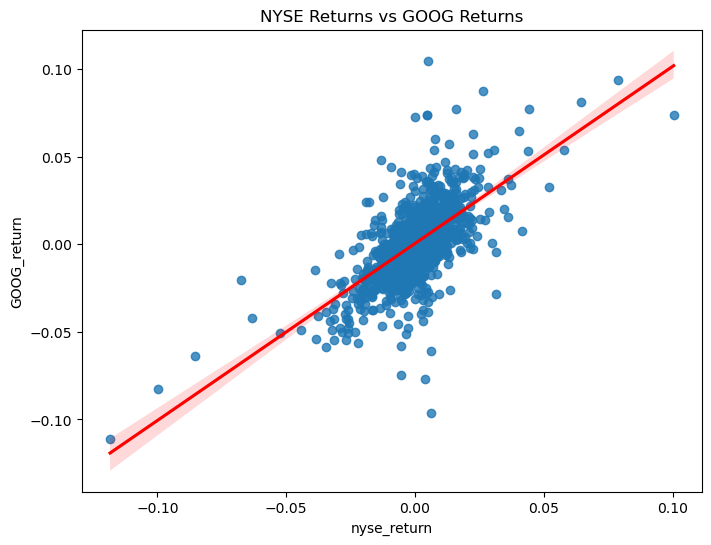

Regression results for META:
                            OLS Regression Results                            
Dep. Variable:            META_return   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     429.6
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           2.73e-82
Time:                        00:54:28   Log-Likelihood:                 2879.6
No. Observations:                1255   AIC:                            -5755.
Df Residuals:                    1253   BIC:                            -5745.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.000

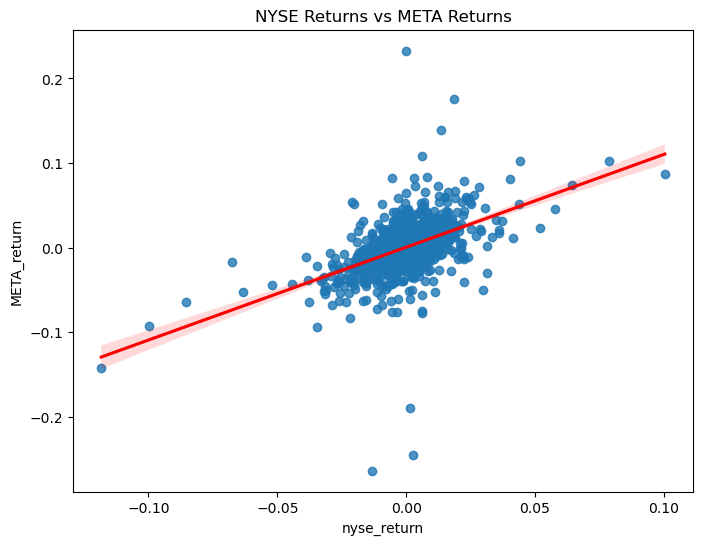

In [ ]:
stock_dfs = {'AMZN': amzn, 'AAPL': aapl, 'NFLX': nflx, 'GOOG': goog, 'META': meta}

for stock_name, stock_df in stock_dfs.items():
    # Merge the dataframes on the index (Date)
    merged_df = pd.merge(nyse[['Return']], stock_df[['Return']], left_index=True, right_index=True, how='inner')
    merged_df.columns = ['nyse_return', f'{stock_name}_return']

    # Define your dependent (y) and independent (X) variables
    X = merged_df[['nyse_return']]
    y = merged_df[f'{stock_name}_return']

    # Add a constant to the independent variable using statsmodels
    X = sm.add_constant(X)

    # Fit the model using Ordinary Least Squares (OLS) regression
    model = sm.OLS(y, X, missing='drop')  # drop rows with missing values
    results = model.fit()

    # Print out the statistics
    print(f"Regression results for {stock_name}:")
    print(results.summary())
    print("\n")

    # Plot the actual data and the regression line
    plt.figure(figsize=(8, 6))
    sns.regplot(x='nyse_return', y=f'{stock_name}_return', data=merged_df, line_kws={'color': 'red'})
    plt.title(f'NYSE Returns vs {stock_name} Returns')
    plt.show()
